# <center>Monte Carlo Algorithms</center>

** N.-B.: You can download the corresponding notebook file and the figure from here **
* <a href="http://lptms.u-psud.fr/membres/rosso/Lecture1.ipynb"> notebook source file</a>
* <a href="http://lptms.u-psud.fr/membres/rosso/pebbles.png"> figure </a>



<img src="pebbles.png" style="width:750px;" align=middle/>
<hr>

##  Direct sampling   (or the children's game)


The favourite game of the kids in Monte Carlo takes palce on the beach, it is  a simple example of direct-sampling Monte Carlo. In the sand a perfect circle inscribed in a perfect square and  many pebbles are evenly drawn inside the square. 
The goal is to give an estimation of the number $\pi$. 

Can you guess what is their strategy?


In [1]:
from random import uniform
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = uniform(-1.0, 1.0), uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits
n_trials = 10000
for attempt in range(10):
    print (attempt, 4 * direct_pi(n_trials) / float(n_trials))

0 3.1352
1 3.1492
2 3.1456
3 3.1616
4 3.144
5 3.1336
6 3.1392
7 3.1812
8 3.1408
9 3.1248


# ADITION (ME)

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['uniform']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [57]:
def calc(n):
    return 4*sum(add(pow(uniform(-1.0,1.0,n),2),pow(uniform(-1.0,1.0,n),2))<1)/n

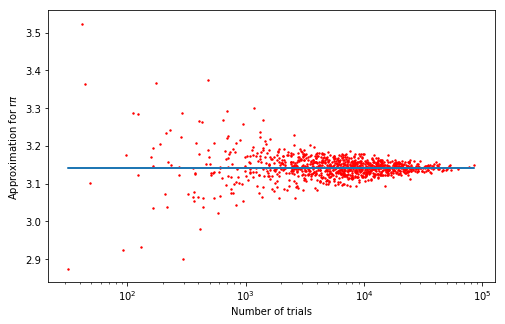

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
N=[int(a) for a in random.exponential(10000,1000)]
ax.scatter(N,[calc(n) for n in N],s=2,c='red')
ax.plot(N,pi*ones(len(N)))
ax.set_xscale('log')
ax.set_xlabel('Number of trials')
ax.set_ylabel('Approximation for $\pi$')

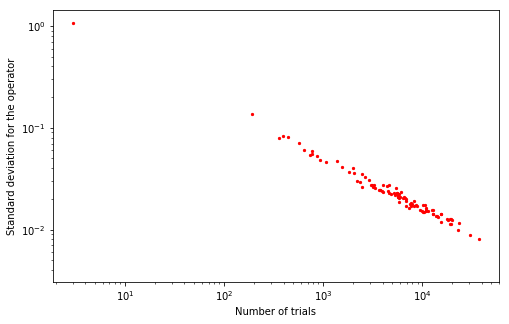

In [103]:
N=[int(a) for a in random.exponential(10000,100)]
M=arange(100)


fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(N,[std([calc(n) for m in M]) for n in N],s=5,c='red')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of trials')
ax.set_ylabel('Approximation for $\pi$')

ax.set_xlabel('Number of trials')
ax.set_ylabel('Standard deviation for the operator')

## End of addition

In general we will deal with physical quantities that can be expressed as integration of this kind:
$$
 \langle O\rangle = \frac{ \int_{-1}^{1} dx \int_{-1}^{1} dy \pi(x,y) O(x,y) } { \int_{-1}^{1} dx \int_{-1}^{1} dy \pi(x,y) }$$
The positive function $\pi(x,y)$ represents the weight of the point $(x,y)$ and $O(x,y)$ is the observable.



In this simple example $\pi(x, y)$ is the
uniform distribution of pebbles within the square, and the  observable is the "hitting variable":
$$
O(x,y)=
\begin{cases}
4 \quad  \text{if $(x,y)$ is within the unit circle} \\
\\
0 \quad  \text{if $(x,y)$ is outside the unit circle}  
\end{cases}
$$
The resul of Monte Carlo is thus:
$$ \langle O\rangle \approx  4 \frac{N_{\text{hits}}}{N_{\text{trials}}}$$

### Comments

* Direct-sampling algorithms exist only for a handful of physically interesting models. 

* Note that $\pi(x, y)$ is in general not normalized
    
* The success of Monte Carlo is based on the existence of a uniform (pseudo) random number generator. 

## Markov Chain Monte Carlo: the adult's game

The same game  is played also by adults but it takes place at Monte Carlo heliport. The helipad is a too large for direct sampling and a Markov chain strategy should be adopted. An adult stands at the last pebble position and draws the new pebble inside a square of side $\delta$. An important rejection problem has to be fixed every time the new pebble jumps outside the helipad. The solution we adopt allows to uniformly cover the large square with pebbles.


In [104]:
from random import uniform
def markov_pi(delta, N):
    x, y = 1.0, 1.0
    N_hits = 0
    for i in range(N):
        del_x, del_y = uniform(-delta, delta), uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs( y + del_y ) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0:
            N_hits += 1.0
    return N_hits

n_trials = 10000
for k in range(10):
    print (4 * markov_pi(0.3, n_trials) / float(n_trials))

3.1396
3.0856
3.1372
3.0364
3.162
3.0728
3.1552
3.1368
3.104
3.0844


### Comments

* In Markov-chain sampling algorithms the initial condition must be allowed, not necessary typical
    Here adults start their promenade from the "club house" located in $(x,y) = (1,1)$.
* The algorithm is correct for all step sizes $\delta$, but the error we make depend on $\delta$ 
*  Rule of thumb for the best $\delta$: the acceptance ratio of Markov chain should be close to $1/2$

## Homogeneous pebble game

For simplicity we discuss a simplified and discrete 3x3 pebble game. The pebble walks on a 3x3-chessboard without periodic boundary conditions. We design a Markov chain algorithm, so that each site is visited with the same probability. Here a pebble throw consists in moving from a site to each of its neighbors with probability $1/4$.

Suppose we are on site a=9, at one time. We can only move to b=8 or c=6, or simply remain at a. This gives


$$
p_{a \to a} + p_{a \to b} + p_{a \to c} = 1
$$


On the same time, to get to a, we either come from a, or from b or from c.


$$
\pi(a)p(a \to a) + \pi(b) p(b\to a) + \pi(c) p(c \to a) = \pi(a)
$$

this gives

###  <center>global balance condition</center>



$$
\pi(b) p(b\to a) + \pi(c) p(c \to a) = \pi(a) p(a\to b) + \pi(a) p(a \to c)$$

A more restrictive condition is called 

### <center>detailed balance condition</center>



$$
\pi(b) p(b\to a) = \pi(a) p(a\to b)
$$


Below a Python implementation for the 3x3 pebble game. With positions 1,2,...,9, the four neighbors of site 1 are (2,4,1,1). This ensures that the pebble moves with probability 1/4 to sites 2 and 4, and remains on site 1 with probability 1/2. We start the simulation from site 9.



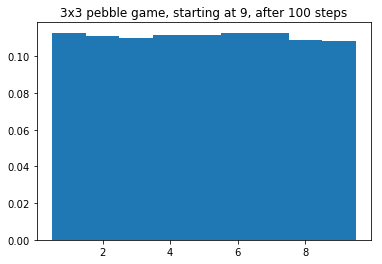

In [105]:
import random, pylab
neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}
all_pos = []
N_iter = 100
for iter1 in range(10000):
    pos = 9
    for iter in range(N_iter):
        pos = neighbor[ pos][ random.randint(0, 3)]
    all_pos.append(pos)
pylab.figure(1)
pylab.hist(all_pos,bins=9,range=(0.5,9.5),normed=True)
pylab.title('3x3 pebble game, starting at 9, after '+str(N_iter)+' steps')
pylab.savefig('histo_3x3_'+str(N_iter)+'_steps.png')
pylab.show()

##   Inhomogeneous pebble game

For a general probability distribution $\left( \pi(1),\pi(2), \dots, \pi(9) \right)$ we can use a particular solution of the detailed balance condition which corresponds to the celebrated


### <center> Metropolis algorithm</center>
$$p(a \to b) = \min(1, \pi(b)/\pi(a) ) $$



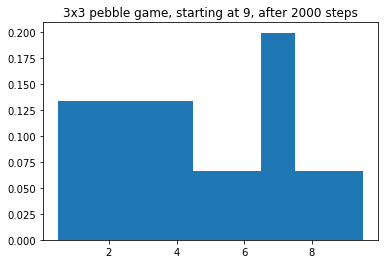

In [106]:
import random, pylab
neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}
all_pos = []
N_iter = 2000
weight= {1 : 2., 2 : 2., 3 : 2., 4 : 2., 5 : 1., 6 : 1.,7 : 3., 8 : 1., 9 : 1.}
for iter1 in range(1):
    pos = 9
    for iter in range(2000000):
        x = random.uniform(0,1)
        posnew = neighbor[pos][ random.randint(0, 3)]
        y = weight[posnew]/weight[pos]
        if x < y :
           pos=posnew 
        all_pos.append(pos)
pylab.figure(1)
pylab.hist(all_pos,bins=9,range=(0.5,9.5),normed=True)
pylab.title('3x3 pebble game, starting at 9, after '+str(N_iter)+' steps')
pylab.savefig('histo_3x3_'+str(N_iter)+'_steps.png')
pylab.show()

### Comments

* Markov-chain Monte Carlo algorithms are a very general tool for integration.
* They access the relevant information in the infinite-time limit (see tutorial).
* The dynamics of the Markov-chain Monte Carlo algorithm is not always physically relevant.
* Many Markov-chain Monte Carlo algorithms satisfy detailed balance, but the necessary condition is global balance.

### References
*  We were deeply inspired by the first chapter of SMAC pp 1-9; 15-22
*  N. Metropolis, A.W. Rosenbluth, M.N. Rosenbluth, A.H. Teller and E. Teller, J. Chem. Phys. 21, 1087 (1953)